In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [ ]:
primeiro_semestre_df1 = pd.read_csv('/content/drive/MyDrive/datasets/archive/ca_21_01.csv', sep=";", decimal = ",", on_bad_lines="skip", encoding = "latin-1")
segundo_semestre_df2 = pd.read_csv('/content/drive/MyDrive/datasets/archive/ca_21_02.csv', sep=';', decimal = ",", on_bad_lines = "skip", encoding = "latin-1")

In [ ]:
# Carregue os dois arquivos CSV em DataFrames
df1 = pd.read_csv('/content/drive/MyDrive/datasets/archive/ca_21_01.csv', sep=";", decimal = ",", on_bad_lines="skip", encoding = "latin-1")
df2 = pd.read_csv('/content/drive/MyDrive/datasets/archive/ca_21_02.csv', sep=';', decimal = ",", on_bad_lines = "skip", encoding = "latin-1")

# Concatene os DataFrames
df_gasolina2021 = pd.concat([df1, df2], ignore_index=True)

# Salve o DataFrame concatenado em um novo arquivo CSV
df_gasolina2021.to_csv('gasolina_2021.csv', index=False)


In [ ]:
display(df_gasolina2021)

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,RS,SAO LEOPOLDO,GASOLINA,01/01/2021,4.599,NaN,R$ / litro,BRANCA
1,S,RS,SAO LEOPOLDO,ETANOL,01/01/2021,4.199,NaN,R$ / litro,BRANCA
2,S,RS,SAO LEOPOLDO,GASOLINA ADITIVADA,01/01/2021,4.799,NaN,R$ / litro,BRANCA
3,S,RS,SAO LEOPOLDO,DIESEL,01/01/2021,3.499,NaN,R$ / litro,BRANCA
4,S,RS,SAO LEOPOLDO,DIESEL S10,01/01/2021,3.599,NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...
807532,NE,BA,JEQUIE,ETANOL,31/12/2021,5.859,NaN,R$ / litro,PETROSERRA
807533,SE,MG,ITUIUTABA,GASOLINA,31/12/2021,6.580,NaN,R$ / litro,BRANCA
807534,SE,MG,ITUIUTABA,ETANOL,31/12/2021,4.740,NaN,R$ / litro,BRANCA
807535,SE,MG,ITUIUTABA,DIESEL S10,31/12/2021,5.448,NaN,R$ / litro,BRANCA


##Tendências Temporais:

<ipython-input-12-437b4307bb91>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_gasolina2021['Data da Coleta'] = pd.to_datetime(df_gasolina2021['Data da Coleta'])


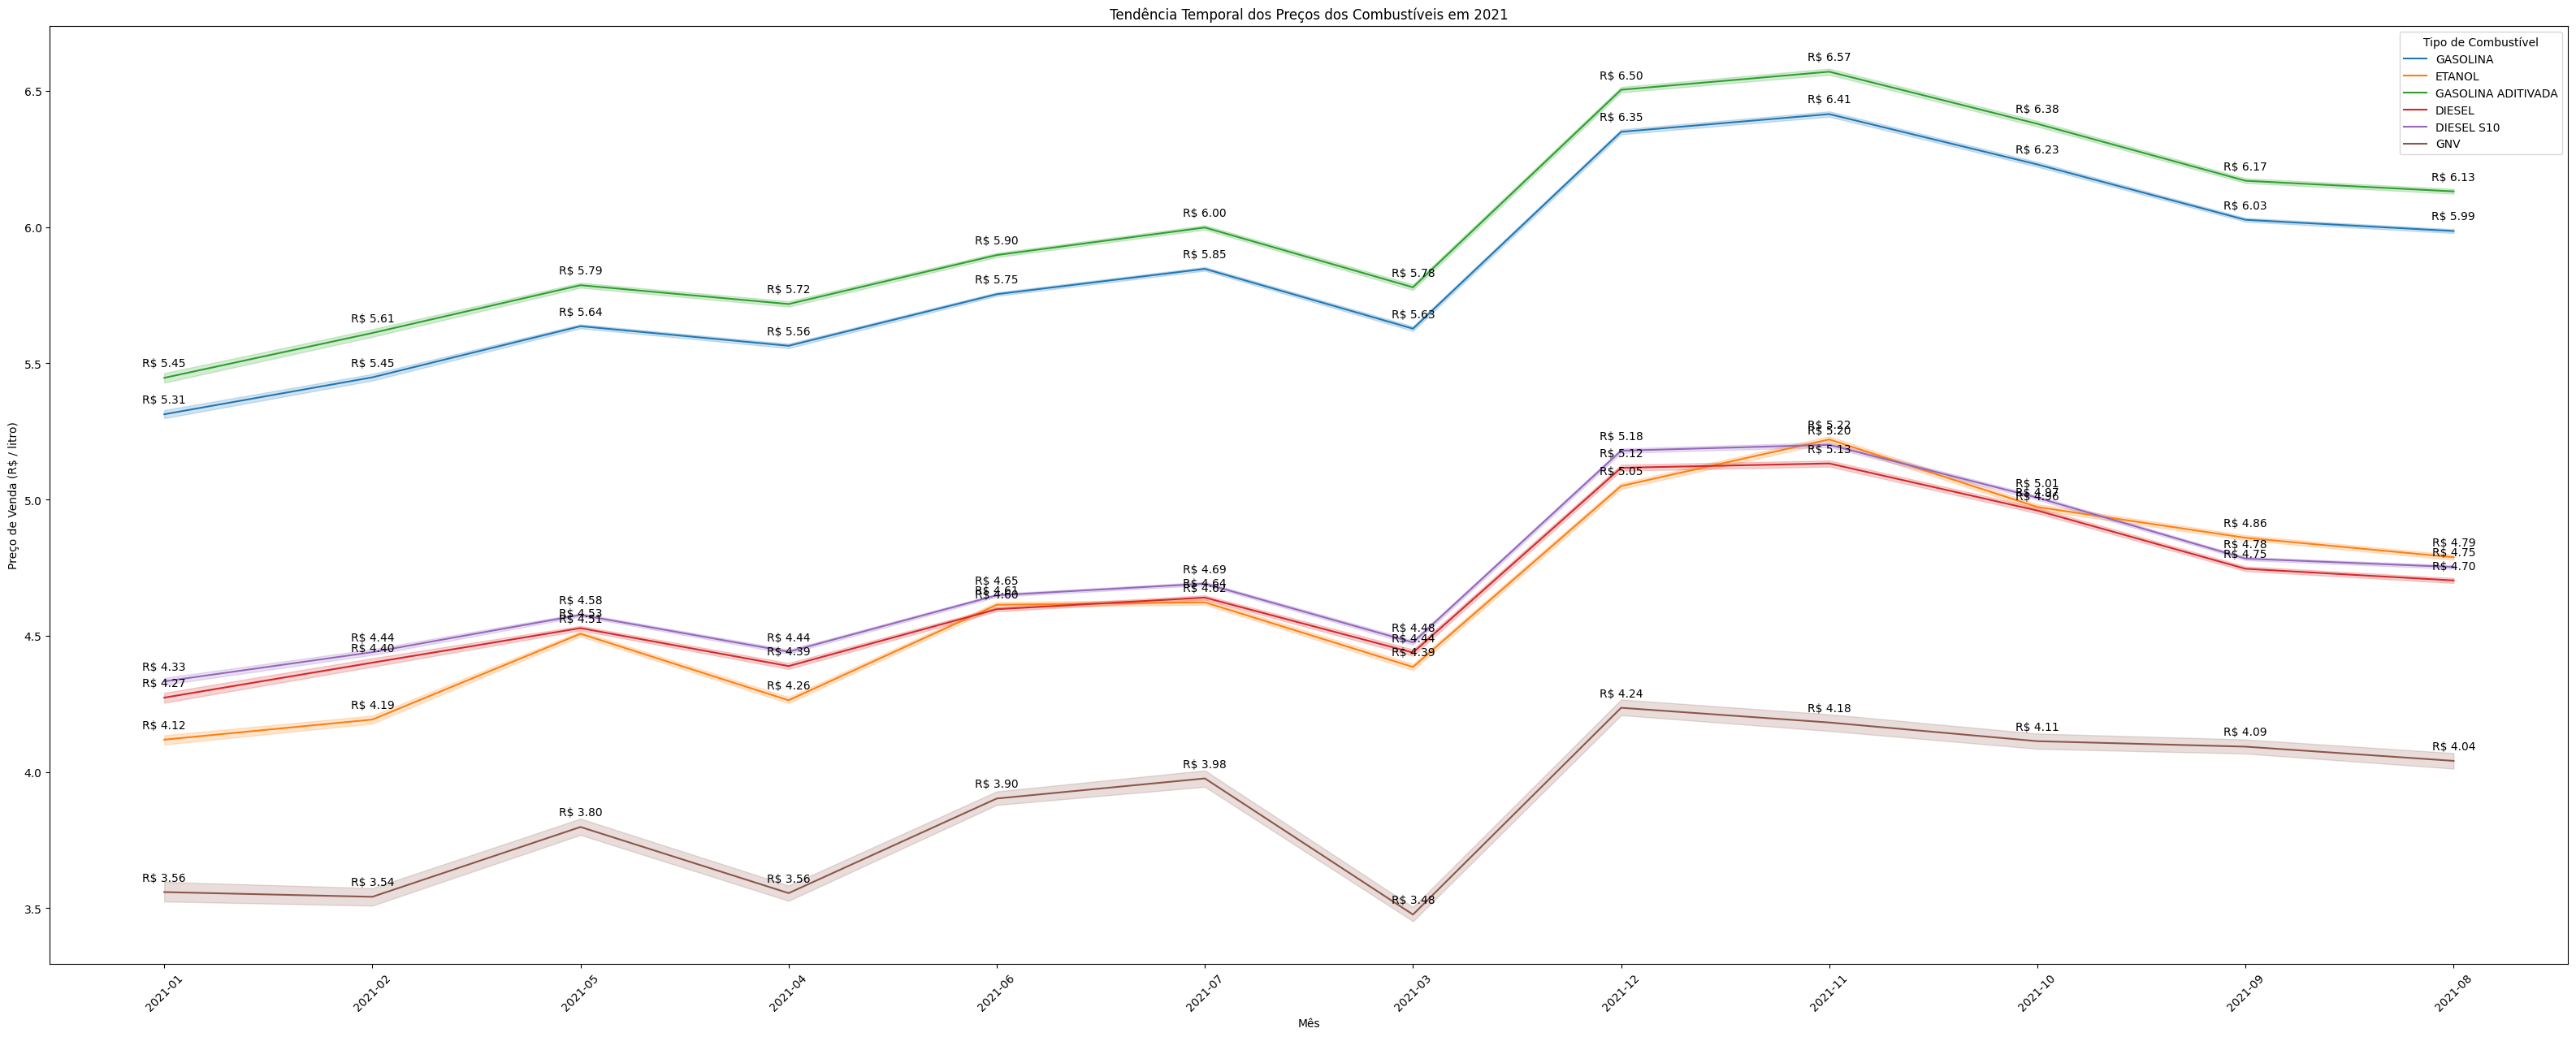

In [ ]:
# Converter 'Data da Coleta' para datetime
df_gasolina2021['Data da Coleta'] = pd.to_datetime(df_gasolina2021['Data da Coleta'])

# Extrair o mês da coluna 'Data da Coleta' e criar uma nova coluna 'Mês'
df_gasolina2021['Mês'] = df_gasolina2021['Data da Coleta'].dt.strftime('%Y-%m')

# Criar um gráfico de linha para mostrar a tendência temporal por mês
plt.figure(figsize=(40, 15))
ax = sns.lineplot(data=df_gasolina2021, x='Mês', y='Valor de Venda', hue='Produto')
plt.title('Tendência Temporal dos Preços dos Combustíveis em 2021')
plt.xlabel('Mês')
plt.ylabel('Preço de Venda (R$ / litro)')
plt.xticks(rotation=45)  # Rotacionar rótulos de data para melhor visualização
plt.legend(title='Tipo de Combustível')

# Adicionar os preços em cada ponto do gráfico
for line in ax.lines:
    x_data, y_data = line.get_data()
    for x, y in zip(x_data, y_data):
        ax.annotate(f'R$ {y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

<ipython-input-13-a93c81a1ef98>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_gasolina2021, x='Mês', y='Valor de Venda', hue='Produto', ci=None)


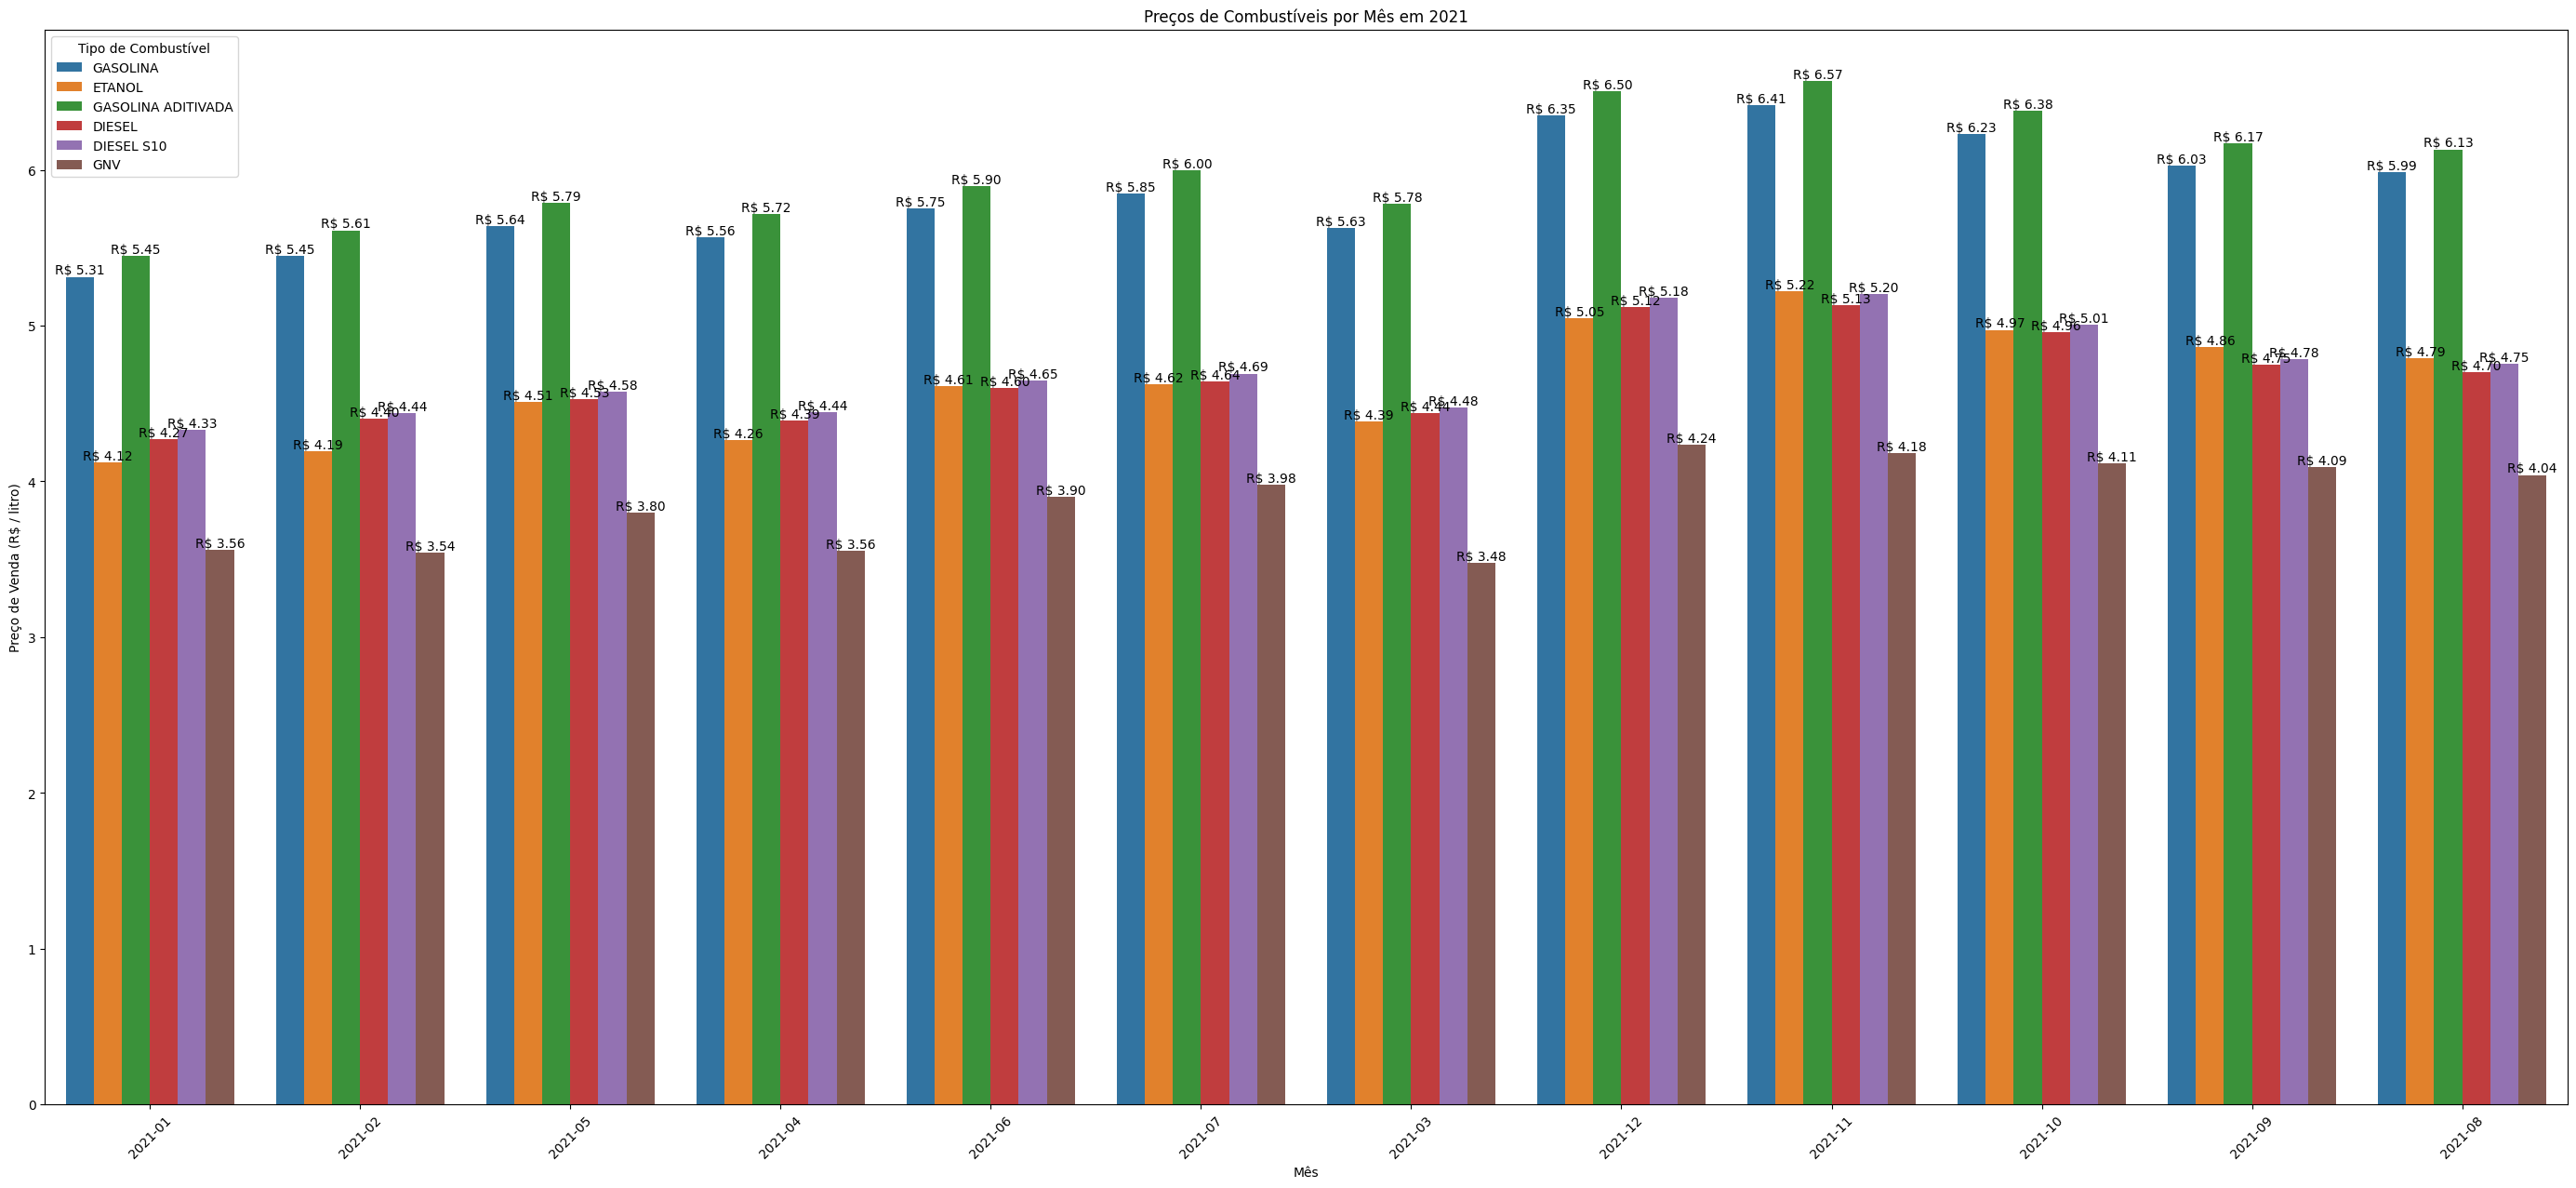

In [ ]:
# Extrair o mês da coluna 'Data da Coleta' e criar uma nova coluna 'Mês'
df_gasolina2021['Data da Coleta'] = pd.to_datetime(df_gasolina2021['Data da Coleta'])
df_gasolina2021['Mês'] = df_gasolina2021['Data da Coleta'].dt.strftime('%Y-%m')

# Criar um gráfico de barras usando Matplotlib e Seaborn
plt.figure(figsize=(35, 15))
sns.barplot(data=df_gasolina2021, x='Mês', y='Valor de Venda', hue='Produto', ci=None)
plt.title('Preços de Combustíveis por Mês em 2021')
plt.xlabel('Mês')
plt.ylabel('Preço de Venda (R$ / litro)')
plt.xticks(rotation=45)  # Rotacionar rótulos de data para melhor visualização
plt.legend(title='Tipo de Combustível')

# Adicionar os valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'R$ {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
# Suponhamos que você já tenha convertido 'Data da Coleta' para datetime e criado a coluna 'Mês' conforme mencionado anteriormente.

# Crie uma tabela pivot que mostre o preço médio de cada combustível por região
tabela_precos_por_combustivel = df_gasolina2021.pivot_table(values='Valor de Venda',
                                                           index=['Regiao - Sigla', 'Produto'],
                                                           columns='Mês',
                                                           aggfunc='mean')

# Arredonde os valores para duas casas decimais (opcional)
tabela_precos_por_combustivel = tabela_precos_por_combustivel.round(2)

# Exiba a tabela
display(tabela_precos_por_combustivel)


Mês                                2021-01  2021-02  2021-03  2021-04  \
Regiao - Sigla Produto                                                  
CO             DIESEL                 4.42     4.56     4.57     4.58   
               DIESEL S10             4.43     4.63     4.63     4.66   
               ETANOL                 3.97     4.12     4.30     4.20   
               GASOLINA               5.44     5.63     5.74     5.76   
               GASOLINA ADITIVADA     5.49     5.72     5.82     5.88   
               GNV                    3.23     3.54     3.24     3.27   
N              DIESEL                 4.62     4.71     4.77     4.82   
               DIESEL S10             4.68     4.71     4.73     4.80   
               ETANOL                 4.52     4.39     4.63     4.79   
               GASOLINA               5.42     5.48     5.65     5.71   
               GASOLINA ADITIVADA     5.59     5.64     5.76     5.89   
               GNV                    3.59     3.71     3.76     3.82   
NE             DIESEL                 4.30     4.44     4.49     4.42   
               DIESEL S10             4.40     4.47     4.47     4.46   
               ETANOL                 4.39     4.45     4.58     4.63   
               GASOLINA               5.42     5.53     5.62     5.53   
               GASOLINA ADITIVADA     5.63     5.72     5.81     5.69   
               GNV                    3.54     3.54     3.46     3.53   
S              DIESEL                 4.05     4.27     4.28     4.21   
               DIESEL S10             4.15     4.32     4.31     4.28   
               ETANOL                 4.31     4.36     4.64     4.51   
               GASOLINA               5.25     5.46     5.58     5.53   
               GASOLINA ADITIVADA     5.38     5.62     5.72     5.67   
               GNV                    3.82     3.83     3.72     3.86   
SE             DIESEL                 4.26     4.33     4.39     4.32   
               DIESEL S10             4.30     4.39     4.46     4.40   
               ETANOL                 3.96     4.05     4.26     4.06   
               GASOLINA               5.25     5.38     5.62     5.53   
               GASOLINA ADITIVADA     5.37     5.54     5.79     5.70   
               GNV                    3.47     3.45     3.41     3.47   

Mês                                2021-05  2021-06  2021-07  2021-08  \
Regiao - Sigla Produto                                                  
CO             DIESEL                 4.65     4.70     4.76     4.89   
               DIESEL S10             4.72     4.79     4.83     4.96   
               ETANOL                 4.36     4.34     4.48     4.63   
               GASOLINA               5.83     5.82     6.01     6.18   
               GASOLINA ADITIVADA     5.93     5.90     6.11     6.30   
               GNV                    3.74     3.56     3.49     3.20   
N              DIESEL                 4.81     5.01     5.00     5.02   
               DIESEL S10             4.85     5.01     5.00     5.04   
               ETANOL                 4.83     5.11     5.09     5.18   
               GASOLINA               5.61     5.90     5.97     6.04   
               GASOLINA ADITIVADA     5.82     6.00     6.09     6.17   
               GNV                    3.76     3.99     3.74     3.88   
NE             DIESEL                 4.60     4.72     4.74     4.86   
               DIESEL S10             4.64     4.73     4.76     4.85   
               ETANOL                 4.89     5.07     5.09     5.19   
               GASOLINA               5.73     5.87     5.96     6.09   
               GASOLINA ADITIVADA     5.88     6.01     6.13     6.23   
               GNV                    3.88     3.96     3.95     4.03   
S              DIESEL                 4.38     4.42     4.49     4.53   
               DIESEL S10             4.43     4.45     4.53     4.57   
               ETANOL                 4.73     4.83     4

##Variações Regionais de preço

In [ ]:
# Agrupe os dados por 'Regiao - Sigla' e calcule a média dos preços de venda
media_preco_por_regiao = df_gasolina2021.groupby('Regiao - Sigla')['Valor de Venda'].mean().reset_index()

# Exiba a média dos preços de venda por região
display(media_preco_por_regiao)


,Regiao - Sigla,Valor de Venda
0,CO,5.280159
1,N,5.472062
2,NE,5.350750
3,S,5.278410
4,SE,5.145612


##Tipos de Combustível:

In [ ]:
# Agrupe os dados por 'Produto' (tipo de combustível) e calcule a média dos preços de venda
media_preco_por_produto = df_gasolina2021.groupby('Produto')['Valor de Venda'].mean().reset_index()

# Exiba a média dos preços de venda por tipo de combustível
display(media_preco_por_produto)

,Produto,Valor de Venda
0,DIESEL,4.694183
1,DIESEL S10,4.740895
2,ETANOL,4.671044
3,GASOLINA,5.887146
4,GASOLINA ADITIVADA,6.037066
5,GNV,3.889377


##Bandeiras de Revendedora: Verifique se há diferenças de preço entre as bandeiras de revendedoras.

In [ ]:
# Agrupe os dados por 'Bandeira' (revendedora) e calcule a média dos preços de venda
media_preco_por_bandeira = df_gasolina2021.groupby('Bandeira')['Valor de Venda'].mean().reset_index()

# Exiba a média dos preços de venda por bandeira de revendedora
display(media_preco_por_bandeira)

In [ ]:
# Agrupe os dados por 'Bandeira' (revendedora) e calcule a média dos preços de venda
media_preco_por_bandeira = df_gasolina2021.groupby('Bandeira')['Valor de Venda'].mean().reset_index()

# Ordene o DataFrame em ordem decrescente de média de preços
media_preco_por_bandeira = media_preco_por_bandeira.sort_values(by='Valor de Venda', ascending=False)

# Selecione as 5 bandeiras mais caras
top_5_bandeiras_caras = media_preco_por_bandeira.head(5)

# Exiba as 5 bandeiras mais caras
print(top_5_bandeiras_caras)


            Bandeira  Valor de Venda
50     TOTALENERGIES        6.012493
5            CHARRUA        5.860228
26            PODIUM        5.854735
20        MONTEPETRO        5.820829
42  SUL COMBUSTÍVEIS        5.665672


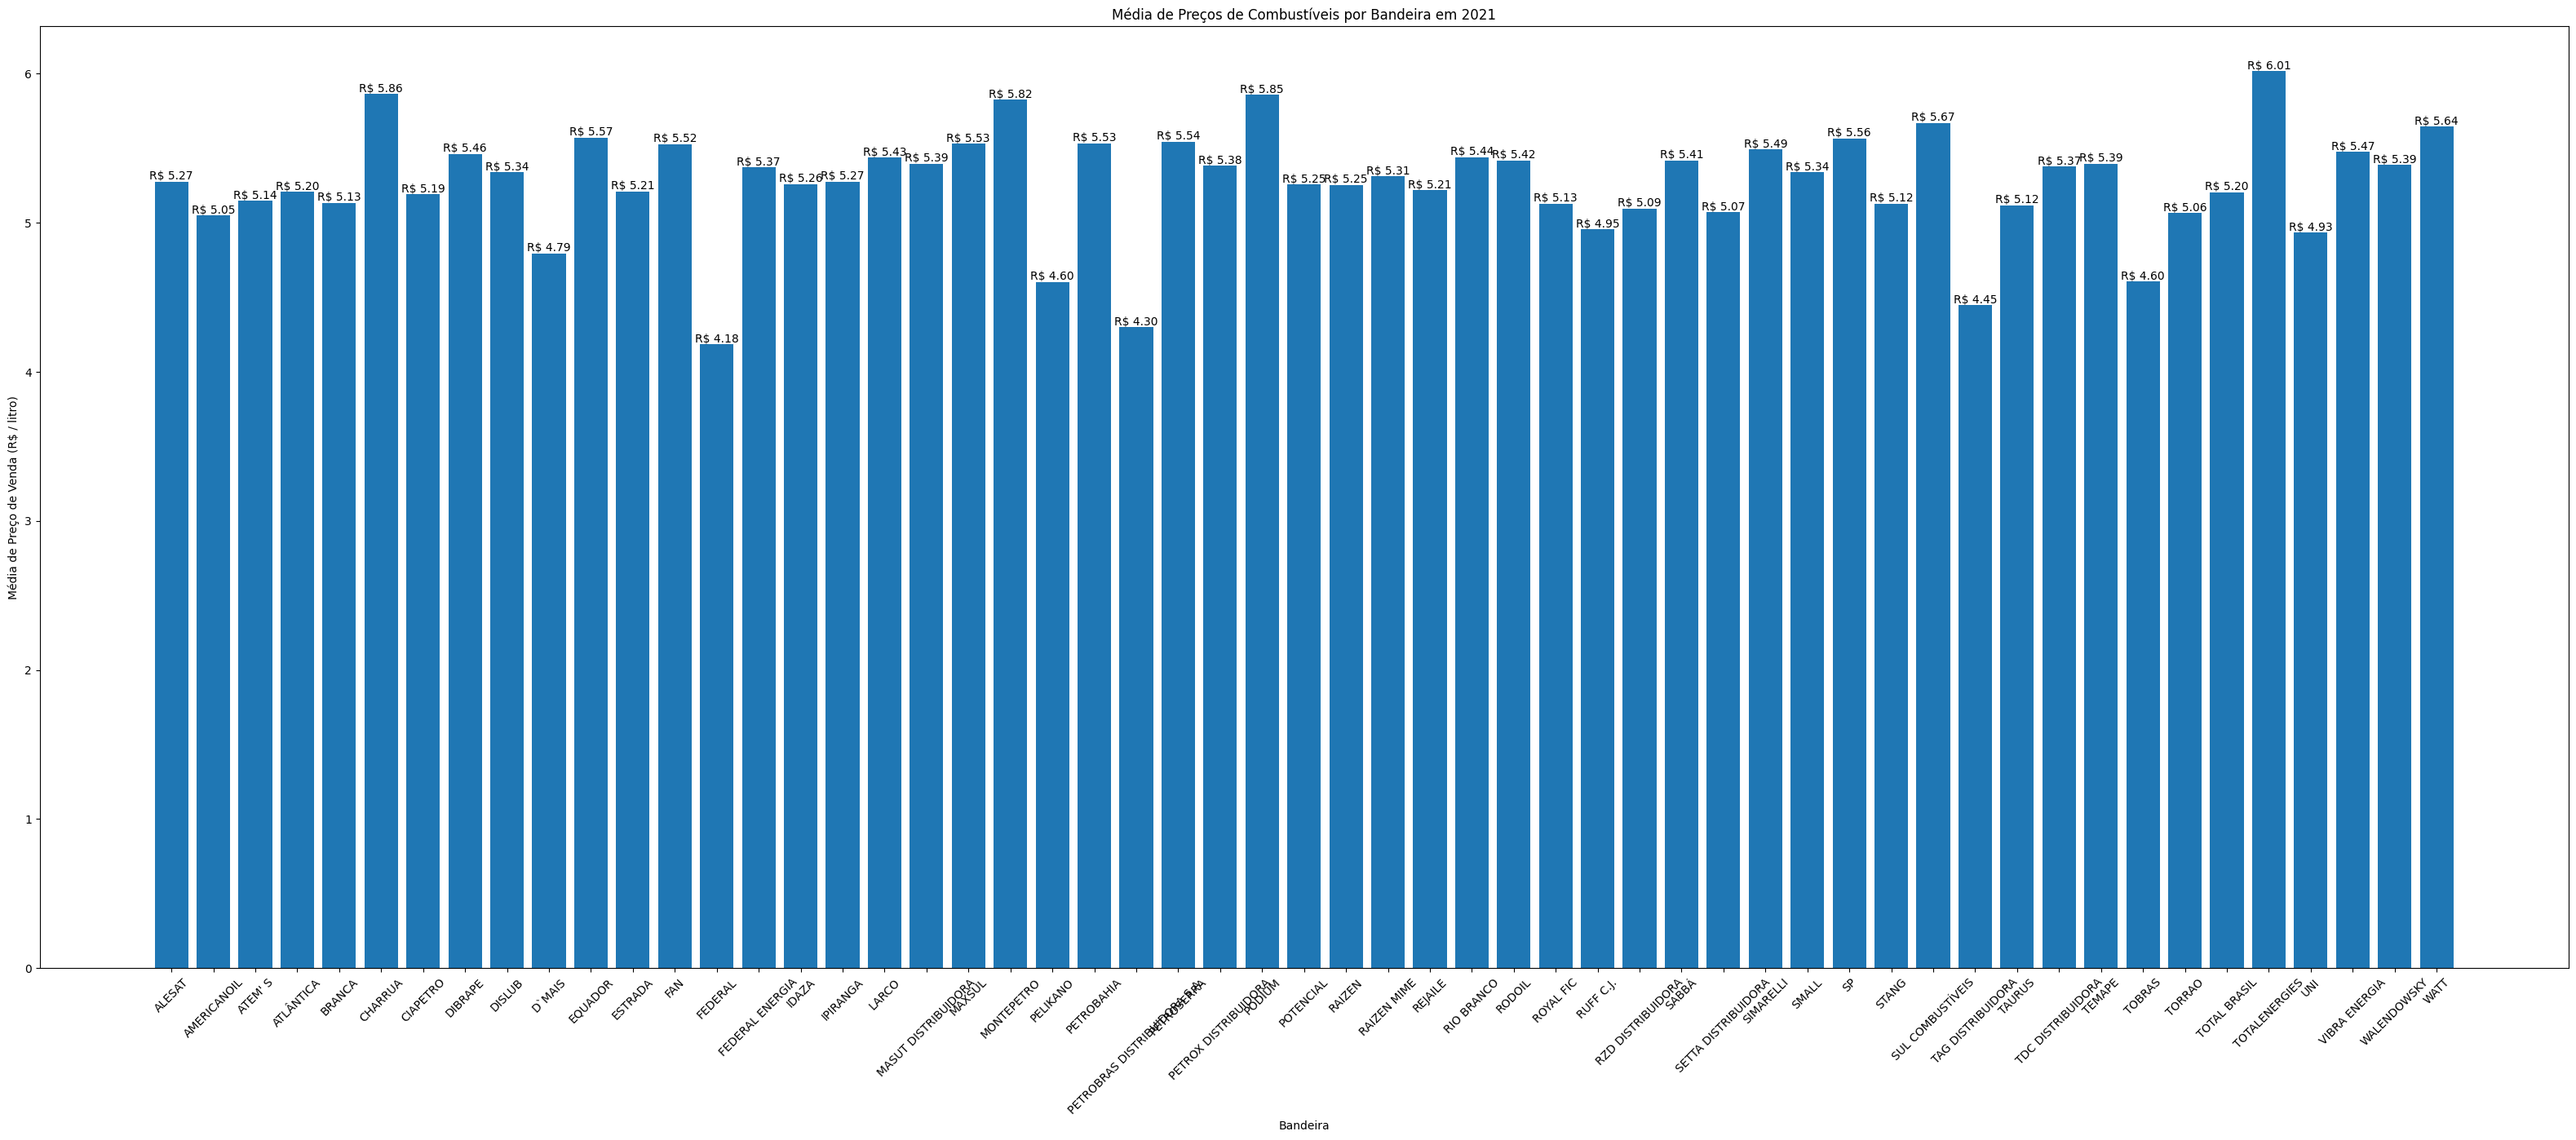

In [ ]:
# Criar um gráfico de barras da média de preços por bandeira
plt.figure(figsize=(40, 15))
plt.bar(media_preco_por_bandeira['Bandeira'], media_preco_por_bandeira['Valor de Venda'])
plt.title('Média de Preços de Combustíveis por Bandeira em 2021')
plt.xlabel('Bandeira')
plt.ylabel('Média de Preço de Venda (R$ / litro)')
plt.xticks(rotation=45)

# Adicionar os valores nas barras
for index, row in media_preco_por_bandeira.iterrows():
    plt.annotate(f'R$ {row["Valor de Venda"]:.2f}', (row["Bandeira"], row["Valor de Venda"]),
                 ha='center', va='bottom', fontsize=10)

plt.show()

##Outliers: Identifique valores atípicos ou outliers nos dados que possam indicar situações incomuns.

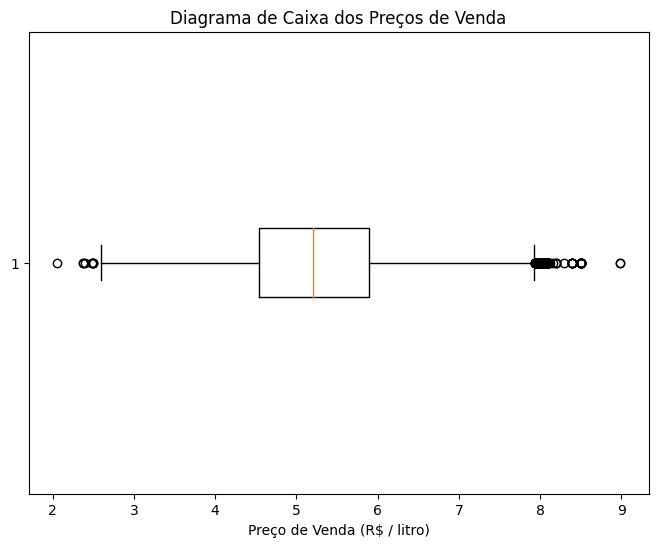

Valores de Venda Considerados Outliers:
       Regiao - Sigla Estado - Sigla  Municipio             Produto  \
140                SE             SP     SUMARE              ETANOL   
13887              SE             SP  SAO PAULO                 GNV   
64951              SE             SP      BAURU              ETANOL   
78028              SE             SP   SOROCABA                 GNV   
102133             SE             SP   SOROCABA                 GNV   
...               ...            ...        ...                 ...   
803587             SE             SP    BARUERI  GASOLINA ADITIVADA   
803591             SE             SP    BARUERI  GASOLINA ADITIVADA   
803595             SE             SP    BARUERI  GASOLINA ADITIVADA   
803602             SE             SP    BARUERI  GASOLINA ADITIVADA   
804175             SE             SP    BARUERI  GASOLINA ADITIVADA   

       Data da Coleta  Valor de Venda  Valor de Compra Unidade de Medida  \
140        2021-02-01          

In [ ]:
# Escolha a coluna de preços de venda para análise
coluna_preco = 'Valor de Venda'

# Calcule os quartis (Q1 e Q3) e o IQR
Q1 = df_gasolina2021[coluna_preco].quantile(0.25)
Q3 = df_gasolina2021[coluna_preco].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifique os outliers
outliers = df_gasolina2021[(df_gasolina2021[coluna_preco] < limite_inferior) | (df_gasolina2021[coluna_preco] > limite_superior)]

# Crie um boxplot para visualizar os outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_gasolina2021[coluna_preco], vert=False)
plt.title('Diagrama de Caixa dos Preços de Venda')
plt.xlabel('Preço de Venda (R$ / litro)')
plt.show()

# Exiba os valores dos outliers
print("Valores de Venda Considerados Outliers:")
print(outliers)

##Análise Descritiva: Calcule estatísticas descritivas, como média, mediana e desvio padrão, para entender a distribuição dos preços.

In [ ]:
# Escolha a coluna de preços de venda para análise
coluna_preco = 'Valor de Venda'

# Calcule a média, mediana e desvio padrão
media_preco = df_gasolina2021[coluna_preco].mean()
mediana_preco = df_gasolina2021[coluna_preco].median()
desvio_padrao_preco = df_gasolina2021[coluna_preco].std()

# Exiba as estatísticas descritivas
print("Estatísticas Descritivas dos Preços de Venda:")
print(f"Média: {media_preco:.2f} R$/litro")
print(f"Mediana: {mediana_preco:.2f} R$/litro")
print(f"Desvio Padrão: {desvio_padrao_preco:.2f} R$/litro")

Estatísticas Descritivas dos Preços de Venda:
Média: 5.24 R$/litro
Mediana: 5.20 R$/litro
Desvio Padrão: 0.93 R$/litro


# Gráficos

Histograma: Um histograma pode ajudar a visualizar a distribuição dos preços de venda.

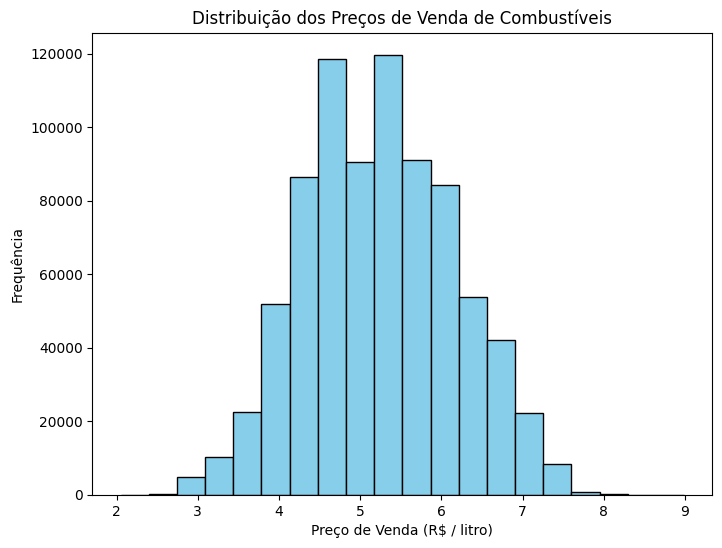

In [ ]:
# Escolha a coluna de preços de venda para análise
coluna_preco = 'Valor de Venda'

# Crie um histograma
plt.figure(figsize=(8, 6))
plt.hist(df_gasolina2021[coluna_preco], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Preços de Venda de Combustíveis')
plt.xlabel('Preço de Venda (R$ / litro)')
plt.ylabel('Frequência')
plt.show()

Boxplot: O boxplot ajuda a identificar outliers e a visualizar a distribuição dos preços.

<ipython-input-22-a2a3f5ce9c06>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_gasolina2021, x='Valor de Venda', y='Produto', ci=None)


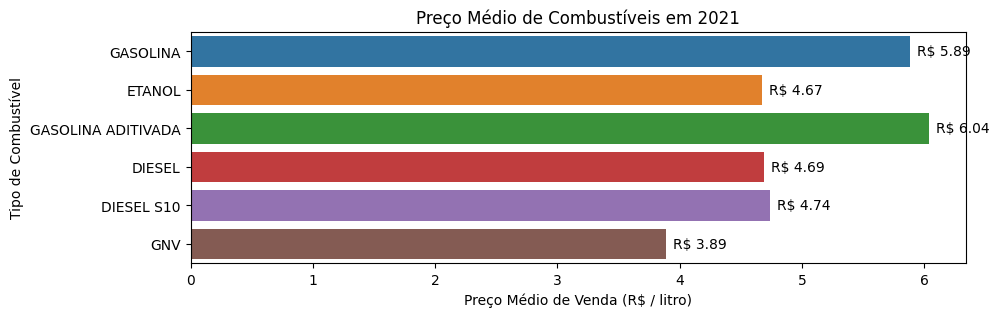

In [ ]:
# Criar um gráfico de barras de acordo com os tipos de combustível
plt.figure(figsize=(10, 3))
ax = sns.barplot(data=df_gasolina2021, x='Valor de Venda', y='Produto', ci=None)
plt.title('Preço Médio de Combustíveis em 2021')
plt.xlabel('Preço Médio de Venda (R$ / litro)')
plt.ylabel('Tipo de Combustível')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

plt.show()

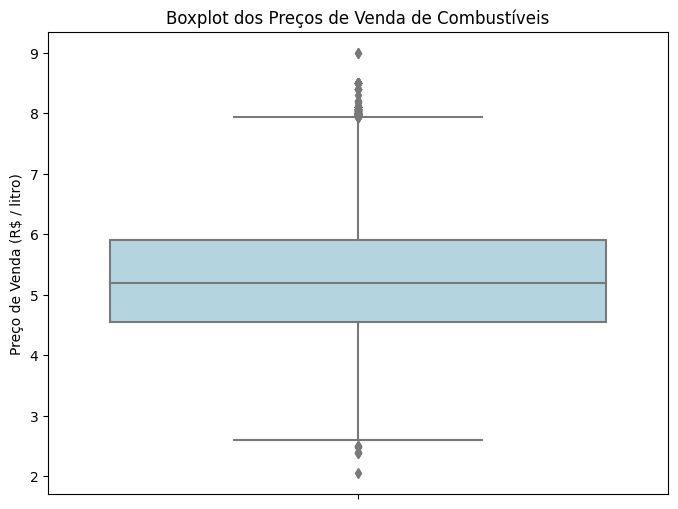

In [ ]:
# Escolha a coluna de preços de venda para análise
coluna_preco = 'Valor de Venda'

# Crie um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_gasolina2021, y=coluna_preco, color='lightblue')
plt.title('Boxplot dos Preços de Venda de Combustíveis')
plt.ylabel('Preço de Venda (R$ / litro)')
plt.show()

Séries Temporais: Se você quiser visualizar a tendência ao longo do tempo, pode criar um gráfico de linha.

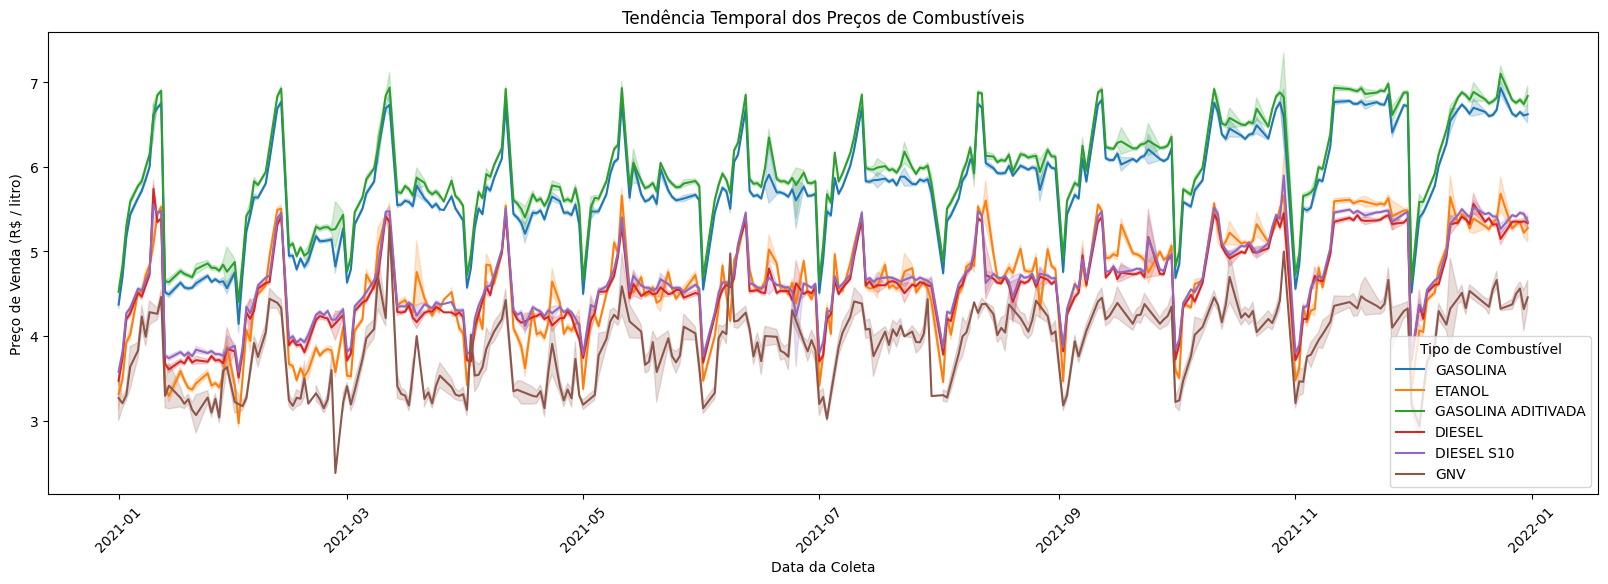

In [ ]:
# Escolha a coluna de data e a coluna de preços de venda para análise
coluna_data = 'Data da Coleta'
coluna_preco = 'Valor de Venda'

# Crie um gráfico de linha para mostrar a tendência temporal
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_gasolina2021, x=coluna_data, y=coluna_preco, hue='Produto')
plt.title('Tendência Temporal dos Preços de Combustíveis')
plt.xlabel('Data da Coleta')
plt.ylabel('Preço de Venda (R$ / litro)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.show()